## Dataset 

In this part of the assignment you will be working with the "MovieLens dataset". The dataset contains users ratings of thousands of motion pictures collected by the MovieLens, a movie recommendation service.

Though the original data was contained in three files, I have combined it into one single file *movielens.csv*. Each row in the dataset represents, a rating provided by the user for a movie at a given time. The following are the description of each column 

* **userId** - The user identifier who provided the rating
* **movieId** - The movie identifier on which the rating was provided
* **rating** - The star rating for a movie. Ranging from half a star to five stars
* **timestamp** - The date and time when the rating was provided
* **title** - Name of the movie
* **genres** - The movie genres
* **year** - the year the movie was released 
* **decade** - the decade the movie was released 

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

movielens = pd.read_csv("https://www3.nd.edu/~jng2/movielens.csv", encoding='latin-1')
movielens.head()

,userId,movieId,rating,timestamp,title,genres,year,decade
0,1,31,2.5,2009-12-14 02:52:24,Dangerous Minds,Drama,1995,1990s
1,1,1029,3.0,2009-12-14 02:52:59,Dumbo,Animation,1941,1940s
2,1,1029,3.0,2009-12-14 02:52:59,Dumbo,Children,1941,1940s
3,1,1029,3.0,2009-12-14 02:52:59,Dumbo,Drama,1941,1940s
4,1,1029,3.0,2009-12-14 02:52:59,Dumbo,Musical,1941,1940s


In [15]:
# Problem 1: Line Plot 

# Plot average rating versus year for each of the following genres.
# - Drama
# - War
# - Comedy

# The plot should contain a line for each of the genres (three lines on a single plot). 
# There should be a legend indicating what each line represents.
# X-axis is the release year, Y-axis is average rating. They should be labeled as such.

# HINT: I would first extract the data by genre into separate DataFrames. For example, for drama, 
# I would do this:
#      data_drama = movielens[ movielens['genres']=='Drama' ]
# Then I would compute the statistic I need using groupby.
# Then I would create the desired plot.

#
# YOUR CODE HERE
#
movielens_s = movielens[['rating','genres','year']].groupby(['genres','year']).aggregate('mean').reset_index()
data_drama = movielens_s[movielens_s['genres']=='Drama'].sort_values('year')
data_war = movielens_s[movielens_s['genres']=='War'].sort_values('year')
data_comedy = movielens_s[movielens_s['genres']=='Comedy'].sort_values('year')

In [16]:
data_drama.head()

,genres,year,rating
581,Drama,1915,3.000000
582,Drama,1921,4.437500
583,Drama,1922,4.000000
584,Drama,1924,3.833333
585,Drama,1925,3.840909


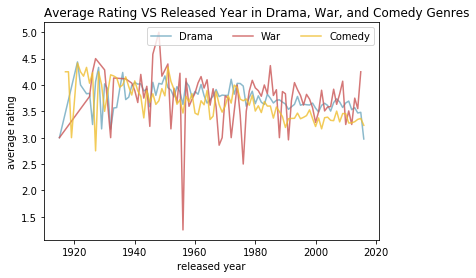

In [24]:
figure, axes = plt.subplots()
axes.plot(data_drama['year'], data_drama['rating'], label='Drama',color='#6EA8BF',alpha=0.8)
axes.plot(data_war['year'], data_war['rating'], label='War',color='#CA5555',alpha=0.8)
axes.plot(data_comedy['year'], data_comedy['rating'], label='Comedy',color='#EFBE2F',alpha=0.8)

axes.set_title(label='Average Rating VS Released Year in Drama, War, and Comedy Genres', loc='left')

axes.set_ylabel('average rating')
axes.set_xlabel('released year')

# Use `fontsize` to adjust the legend font size.
axes.legend(ncol=3, loc='upper right', fontsize=10)